# CSE555: Introduction to Pattern Recognition
## Spring 2021 <br>
## Professor: Wen Dong <br>

### Final Project Report <br>
#### Name: Ananth Deepak Sharma Nanduri <br>
#### UB ID: 50372669

## Task 1

## 1 Introduction 

Write an introduction section for your project, state why you choose this topic and the
objective of your project.

In this project we shall analyse the performance of RandomForest Classifier and Artificial neural network on the loan prediction dataset. https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

Both the Random Forest and Neural Networks are different techniques that learn differently but can be used in similar domains. Random Forest is a technique of Machine Learning while Neural Networks are exclusive to Deep Learning.

What are Neural Networks?
A Neural Network is a computational model loosely based on the functioning cerebral cortex of a human to replicate the same style of thinking and perception. Neural Networks are organized in layers made up of interconnected nodes which contain an activation function that computes the output of the network.

What is Random Forest?

Random Forest is an ensemble of Decision Trees whereby the final/leaf node will be either the majority class for classification problems or the average for regression problems.

The objective of this project is to analyse the performance of both these models on the loan prediction dataset.





## 2 Methods Section

### Design of this project :

1. In this project we import the dataset from the CSV file .
2. Then we preprocess the data to remove unwanted and missing values.
3. Then we perform Label encoding to turn all the columns into integers.
4. Then we split the dataset to test and train splits.
5. Train the models using training data and predict the outcomes using test data and analysing the results.

In this project we use Machine learning algorithms, Data preprocessing , Metrics and visualization libraries.

In [27]:
# Here we import the necessary packages for handling the data
import pandas as pd 
import numpy as np 


In [28]:
# Reading the Input file
data = pd.read_csv('train_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
# Dropping the unnecessary columns
data.drop(columns = 'Loan_ID')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [30]:
# Querying for the column names
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
from sklearn import preprocessing

In [32]:
# Encoding the data to turn strings to integers to make it easy for math
L= preprocessing.LabelEncoder()
for i in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']:
       data[i] = L.fit_transform(data[i])

In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [34]:
# Dropping NaN values
data = data.apply (pd.to_numeric, errors='coerce')
data = data.dropna()

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [35]:
data.shape

(529, 13)

In [36]:
# Splitting the data frame to X and Y
X = data[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = data['Loan_Status']
print(X.shape, y.shape)

(529, 11) (529,)


In [37]:
# splitting the data to test and Train splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state = 42)

In [38]:
# Training the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [39]:
# Predicting the outputs for the test data
y_pred = clf.predict(X_test)

In [40]:
print(y_pred)
print(type(y_test))

[0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0]
<class 'pandas.core.series.Series'>


In [41]:
y_test.shape

(159,)

In [42]:
# Converting the series data structure to numpy for easy metric computation
y_test_np = y_test.to_numpy()

In [43]:
print(type(y_test_np))

<class 'numpy.ndarray'>


In [44]:
# Importing metrics and to output the factors for analysis
from sklearn import metrics
accuracy_score_RndmForest = metrics.accuracy_score(y_pred, y_test)
print("Accuracy score for the Random Forest Model is : ",accuracy_score_RndmForest*100)

Accuracy score for the Random Forest Model is :  81.76100628930818


### Using ANN


In [45]:
#Importing the neural network and training it
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann.fit(X, y)
y_ann_pred = ann.predict(X_test)


## 3 Reports and Results

In [46]:

accuracy_score_lq = metrics.accuracy_score(y_ann_pred, y_test)

In [47]:
print("Accuracy Score for Artificial Neural Network is :",accuracy_score_lq*100)

Accuracy Score for Artificial Neural Network is : 67.9245283018868


F1 score for Logistic Regression is :  0.8796680497925311
[[ 24  27]
 [  2 106]]


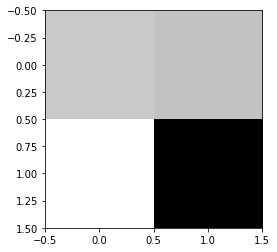

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score
f1_score_rf = f1_score(y_test, y_pred)
print("F1 score for Logistic Regression is : ", f1_score_rf)

confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print(confusion_matrix_rf)
plt.imshow(confusion_matrix_rf, cmap='binary')  

F1 score for ANN is :  0.8089887640449438
[[  0  51]
 [  0 108]]


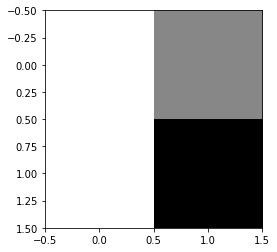

In [49]:
f1_score_ann = f1_score(y_test, y_ann_pred)  
print("F1 score for ANN is : ", f1_score_ann)
confusion_matrix_ann = confusion_matrix(y_test, y_ann_pred)
print(confusion_matrix_ann)
plt.imshow(confusion_matrix_ann, cmap='binary')

[0.8176100628930818, 0.6792452830188679]
['Rndom Forest', 'Artificial Neural Network']


Text(0.5, 0, 'Model')

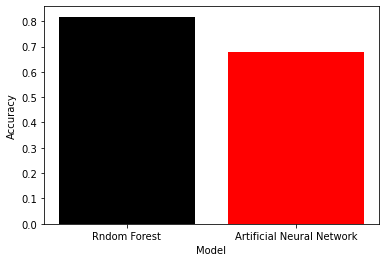

In [50]:
accuracy_list = [accuracy_score_RndmForest, accuracy_score_lq]
f1_score_list = [f1_score_rf, f1_score_ann]
model_names = ["Rndom Forest", "Artificial Neural Network"]
print(accuracy_list)
print(model_names)

plt.bar(model_names, accuracy_list, color=['black', 'red'])
plt.ylabel("Accuracy")
plt.xlabel("Model")

## 4  Discussion Section

### Findings:

We can observe that Random Forest did better than the artificial Neural network model on this dataset. The accuracy score and f1 score metrics which we have computed for the two algorithms proved to be better in case of the Random forest classifier

### Limitations 

In this project we considered only a very few parameters while training the models so many more additions could be done like trying with different levels of hidden layers 

### Possible future Works:

1. Many tweaks can be made to the default methods from the libraries by choosing different parameters.
2. We can consider few more metrics to analyse the algorithms.


## Task 2 

### Ethics Assignment

Artificial Intelligence is rapidly gaining pace in innovations as more and more people are interested in learning the science behind it. Companies like Google, SpaceX, Amazon, DeepMind are using AI to solve many problems that over-power traditional algorithms over a large scale. The increase in data being generated daily is adding up to the accuracy of the algorithms. Many people fear AI overtaking the intelligence of humans. Some of the limitations of AI are Unemployment, Inequality, Security etc. Now let us discuss on these in detail.
Unemployment is to be taken ultimate care as people fear that AI is going to replace a lot of jobs which leaves most of the currently working population unemployed which is not the case. As Machines need to work in harmony with humans as AI improves its ability it opens new job markets like space industry, mining etc. So, people don’t need to fear about losing jobs due to artificial intelligence. The other one is Inequality, as AI improves its abilities and delve deep into industries companies make more profits which creates an imbalance in the wealth distribution. So, laws should be formulated to distribute the income generated due to the use of AI and distribute that among the population so-as to maintain a wealth balance like Universal General Income.  The most important problem that needs a lot of consideration is Security, artificial intelligent systems need to be in safer hands as if they are into wrong hands, they can easily misuse that sue to the employment of a large amount of data into the model. Also, if the machines are out of control, they can take over the populations intelligence very easily, so a kill switch should be enabled for every system to handle it in case of any unexpected events. At the end of the day computers are as smart as the humans using them they just are a little fast. 
So I feel while developing Artificial Intelligence proper measures are to be taken and also while implementing them.


## References
 
[1] https://scikit-learn.org/stable/ <br>
[2] https://en.wikipedia.org/wiki/Artificial_neural_network <br>
[3] https://en.wikipedia.org/wiki/Random_forest <br>
[4] https://matplotlib.org/ <br>
[5] https://www.kdnuggets.com/2019/06/random-forest-vs-neural-network.html <br>
[6] https://towardsdatascience.com/ <br>
[7] https://towardsdatascience.com/3-reasons-to-use-random-forest-over-a-neural-network-comparing-machine-learning-versus-deep-f9d65a154d89